# Analysis of Paleo Temperature, CO2 and Methane changes over the past 800,000 years

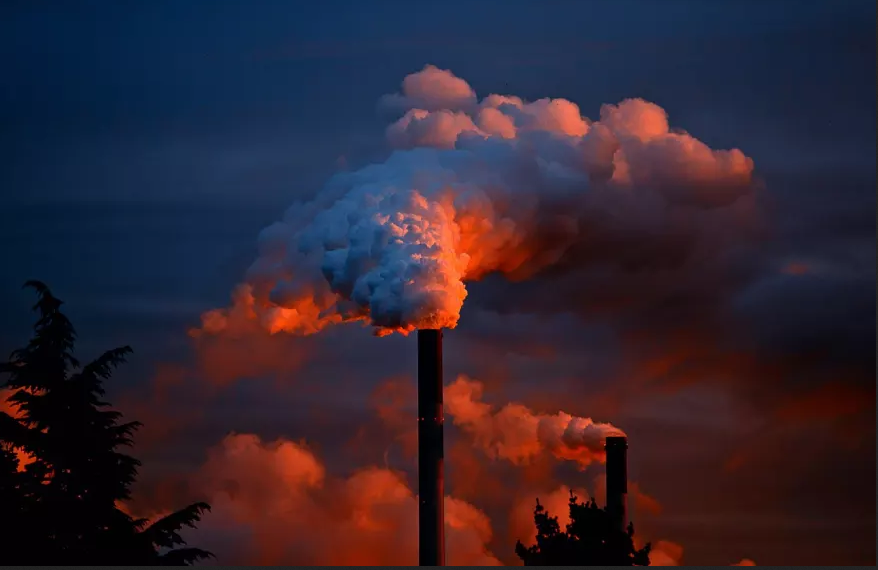

Greenhouse gases began with the onset of the industrial era around 1750. Picture: Pixabay

***
Author: Emma Dunleavy

Student Number: g00425660

Module: Programming for Data Analysis Winter 2023/24 

Lecturer: Brian McGinley
***

Required libraries.

In [2021]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import scipy.stats as ss
import sklearn.neighbors as nei
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
import matplotlib.dates as mdates
import statsmodels.api as sm

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 5]

In [2022]:
warnings.simplefilter(action='ignore', category=FutureWarning)

<div class="alert alert-block alert-info"><b>Note:</b> For Paleo data sets the age unit is in calendar years before present (yr BP) whereas present refers to 1950.</div>


## CO2 From 800kyrs to Present 

Reading in CO2 data from https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls saved locally as "correctedantarctica2015co2.csv".

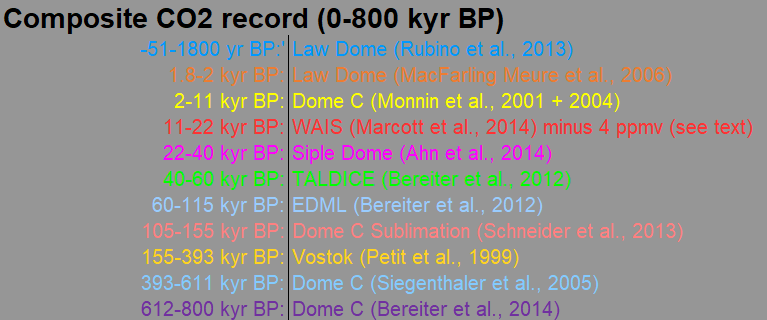

In [2023]:
# Read in CO2 data.
co2df=pd.read_csv('Data/correctedantarctica2015co2.csv', skiprows=14, usecols=[0,1,])

In [2024]:
# Show dataframe.
co2df

,Gasage (yr BP),CO2 (ppmv)
0,-51.03,368.02
1,-48.00,361.78
2,-46.28,359.65
3,-44.41,357.11
4,-43.08,353.95
...,...,...
1896,803925.28,202.92
1897,804009.87,207.50
1898,804522.67,204.86
1899,805132.44,202.23


In [2025]:
base_year = 1950
co2df['Gasage (yr BP)'] = base_year - co2df['Gasage (yr BP)']

In [2026]:
co2df

,Gasage (yr BP),CO2 (ppmv)
0,2001.03,368.02
1,1998.00,361.78
2,1996.28,359.65
3,1994.41,357.11
4,1993.08,353.95
...,...,...
1896,-801975.28,202.92
1897,-802059.87,207.50
1898,-802572.67,204.86
1899,-803182.44,202.23


In [2027]:
# Convert year to int.
co2df['year_co2'] = co2df['Gasage (yr BP)'].astype(int)

# Remove excess column.
co2df = co2df.drop(columns=('Gasage (yr BP)'))

In [2028]:
# Show.
co2df 

,CO2 (ppmv),year_co2
0,368.02,2001
1,361.78,1998
2,359.65,1996
3,357.11,1994
4,353.95,1993
...,...,...
1896,202.92,-801975
1897,207.50,-802059
1898,204.86,-802572
1899,202.23,-803182


### CO2 Time-Series

[Text(0.5, 1.0, 'Corrected Composite CO2 800kyrs to Present')]

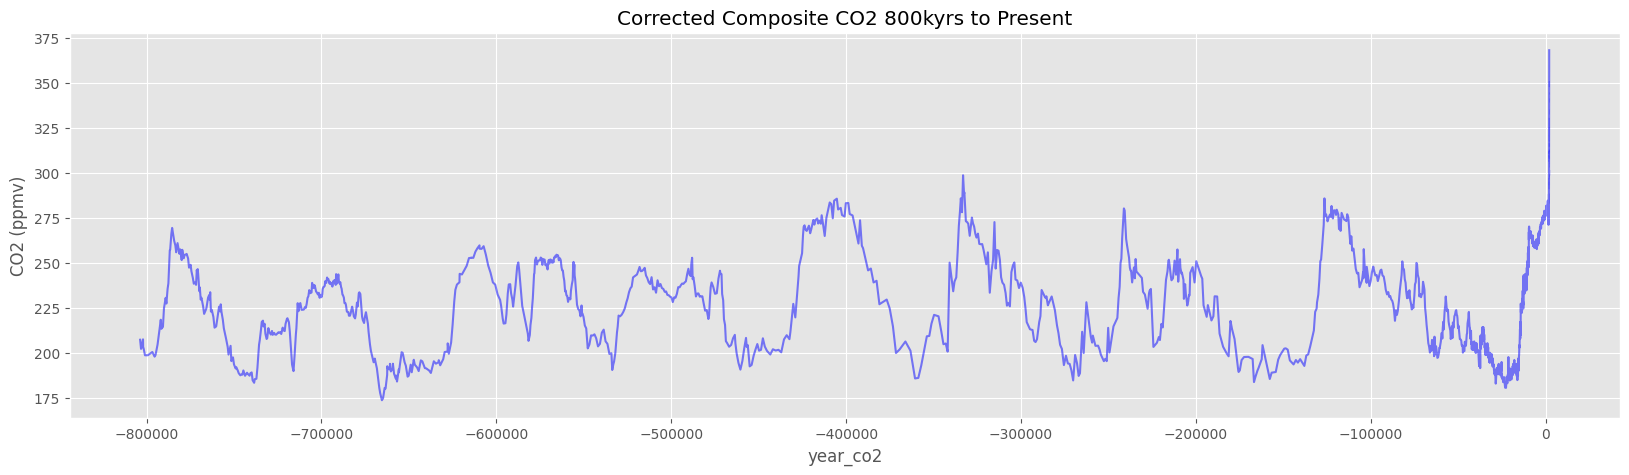

In [2029]:
# Plot CO2 data on lineplot.
sns.lineplot(data=co2df, x='year_co2', y='CO2 (ppmv)', color='blue', alpha = 0.5).set(title='Corrected Composite CO2 800kyrs to Present')

In [2030]:
# Convert co2 reading to numpy array.
co2 = co2df['CO2 (ppmv)'].to_numpy()

# Show.
co2

array([368.02, 361.78, 359.65, ..., 204.86, 202.23, 207.29])

In [2031]:
# Get mean of CO2 readings.
co2_mean = co2.mean()

# Show.
co2_mean

235.56669121514994

In [2032]:
# Get standard deviation of CO2 readings.
co2_std = co2.std()

# Show. 
co2_std

35.89326179283893

### CO2 Frequency Analysis

Text(0.5, 1.0, 'CO2 Frequency Analysis - Histogram')

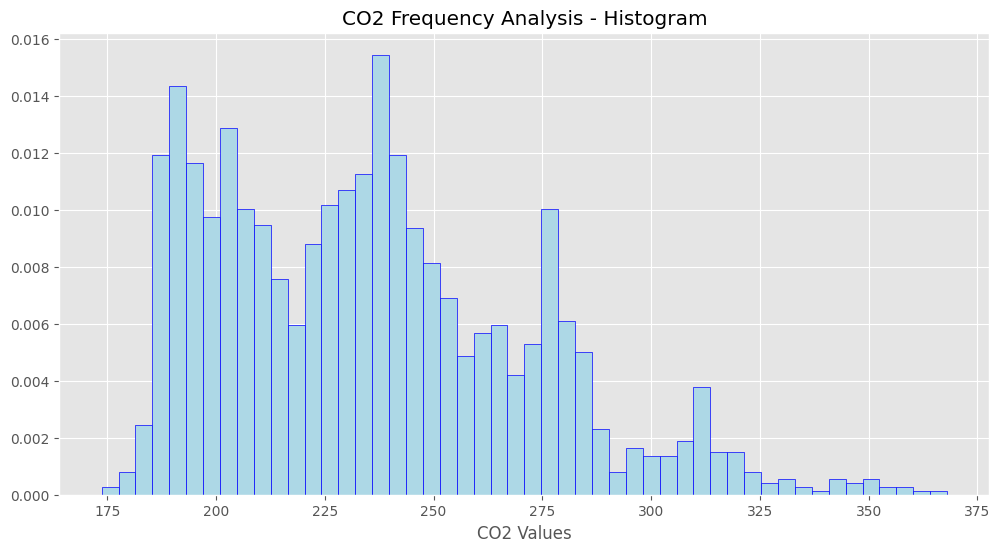

In [2033]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Plot CO2 data on histogram.
ax.hist(co2, bins=50, density=True, color="lightblue", ec="blue" )

# Add x-axis lable. 
plt.xlabel('CO2 Values')

# Add title.
plt.title('CO2 Frequency Analysis - Histogram')

Text(0.5, 1.0, 'CO2 Frequency Analysis - KDE Plot')

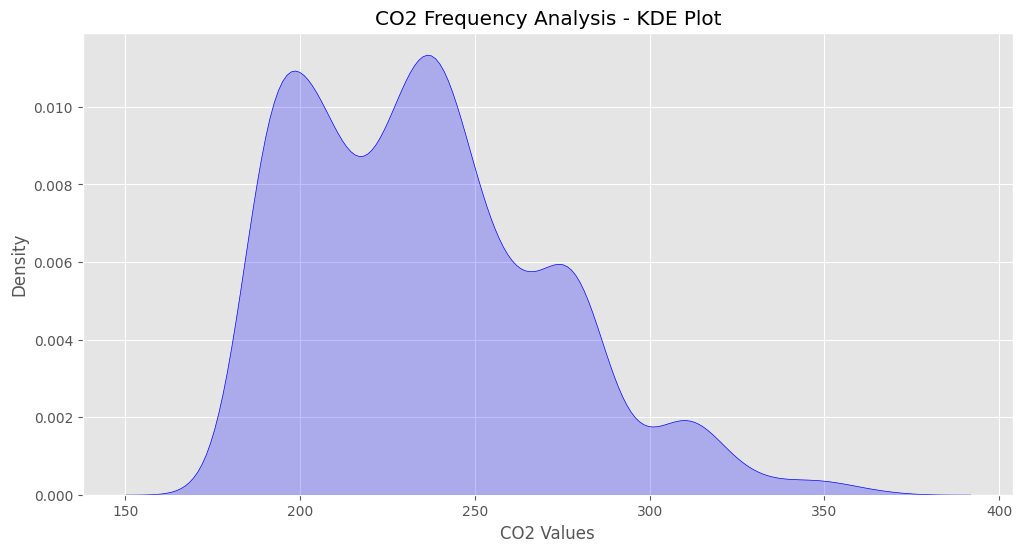

In [2034]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Plot CO2 data on KDE plot.
sns.kdeplot(co2, fill=True, color="Blue")

# Add x-axis label.
plt.xlabel('CO2 Values')

# Add y-axis label.
plt.ylabel('Density')

#Add title. 
plt.title('CO2 Frequency Analysis - KDE Plot')


The output is a multimodal distribution with two main peaks, one at 195ppmv and a second at 240ppmv and a third, smaller peak at 275ppmv. There is an increased frequency of CO2 readings in the data set at these values. 

## Temperature From 800kyrs to Present 


Temperature data attained from https://vlegalwaymayo.atu.ie/mod/resource/view.php?id=874744. The original source is at

https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt, extracted and saved locally in a csv file called 'temperaturedata.csv'.

In [2035]:
# Read in csv file.
tempdf=pd.read_csv('Data/temperaturedata.csv',  usecols=[2,5])

In [2036]:
# Show.
tempdf

,EDC3béta,temp
0,-50.00000,218.3
1,-43.55977,218.3
2,-37.44019,218.3
3,-31.64156,218.3
4,-24.55278,218.3
...,...,...
5814,816871.60000,211.0
5815,817693.60000,211.2
5816,818505.50000,211.3
5817,819303.10000,211.4


In [2037]:
# Convert EDC3béta to calendar year.
base_year = 1950
tempdf['EDC3béta'] = base_year - tempdf['EDC3béta']

In [2038]:
# Convert year to int.
tempdf['year_temp'] = tempdf['EDC3béta'].astype(int)

tempdf = tempdf.drop(columns='EDC3béta')

In [2039]:
# Show.
tempdf

,temp,year_temp
0,218.3,2000
1,218.3,1993
2,218.3,1987
3,218.3,1981
4,218.3,1974
...,...,...
5814,211.0,-814921
5815,211.2,-815743
5816,211.3,-816555
5817,211.4,-817353


### Temperature Time-Series

[Text(0.5, 1.0, 'Temperature 800kyrs to Present')]

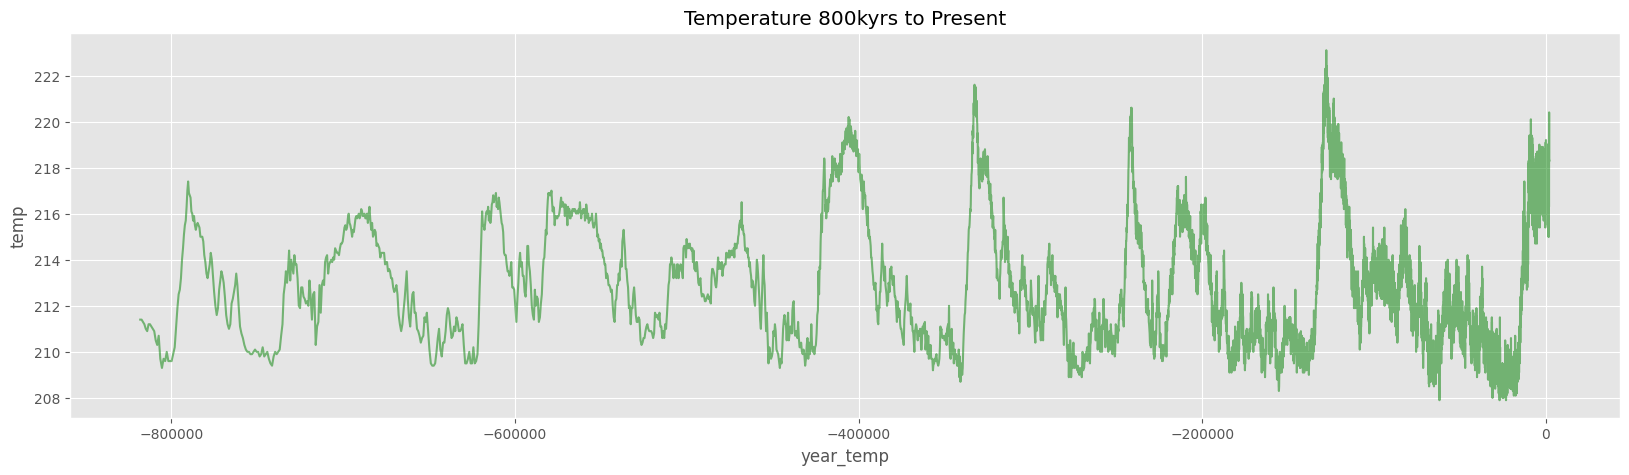

In [2040]:
# Line plot of temperature.
sns.lineplot(data=tempdf, x='year_temp', y='temp', color='green', alpha = 0.5).set(title='Temperature 800kyrs to Present')


In [2041]:
# Create a temp numpy array.
temp = tempdf['temp'].to_numpy()
temp

array([218.3, 218.3, 218.3, ..., 211.3, 211.4, 211.4])

In [2042]:
# Get temp mean.
temp_mean = tempdf['temp'].mean()

# Show.
temp_mean

213.4747207423956

In [2043]:
# Get temp standard deviation.
temp_std = tempdf['temp'].std()

# Show.
temp_std

3.130074880221473

### Temprature Frequency Analysis

Text(0.5, 1.0, 'Temperature Frequency Analysis - Histogram')

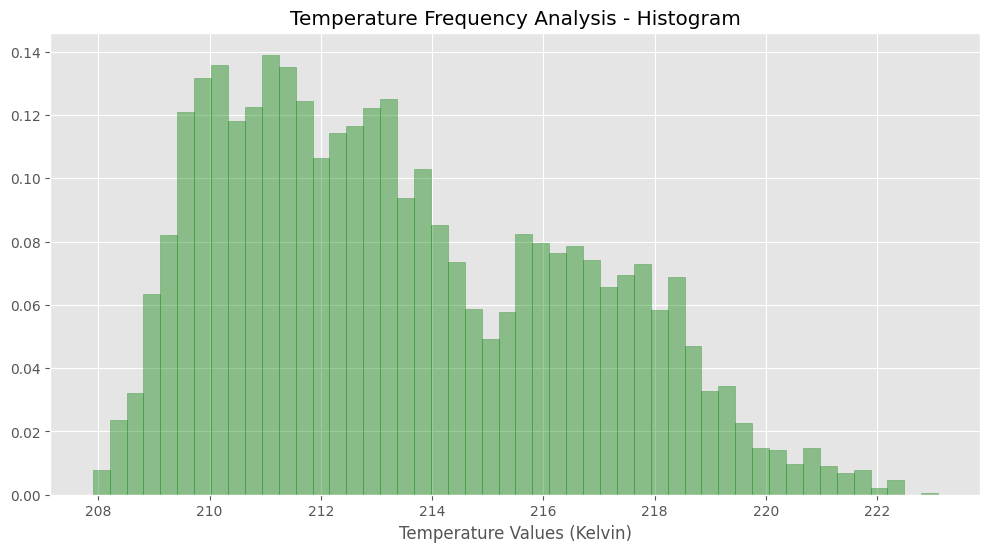

In [2044]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Plot temp data.
ax.hist(temp, bins=50, density=True, color="green", alpha = 0.4, ec="green" )

# Add x-axis label.
plt.xlabel('Temperature Values (Kelvin)')

# Add y-axis label.
plt.title('Temperature Frequency Analysis - Histogram')

Text(0.5, 1.0, 'Temperature Frequency Analysis - KDE')

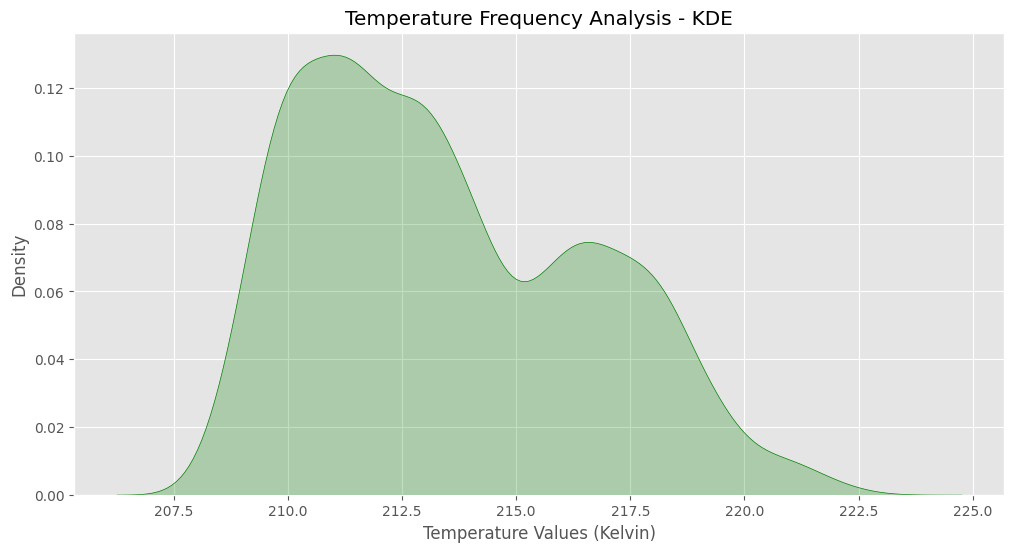

In [2045]:
# Plotting. 
fig, ax = plt.subplots(figsize=(12,6))

# Plot the temp data.
sns.kdeplot(temp, fill=True, color="Green")

# Add x axis label. 
plt.xlabel('Temperature Values (Kelvin)')

# Add y axis label. 
plt.ylabel('Density')

# Add title.
plt.title('Temperature Frequency Analysis - KDE')

### CO2 and Temperature Grouped Time-Series 

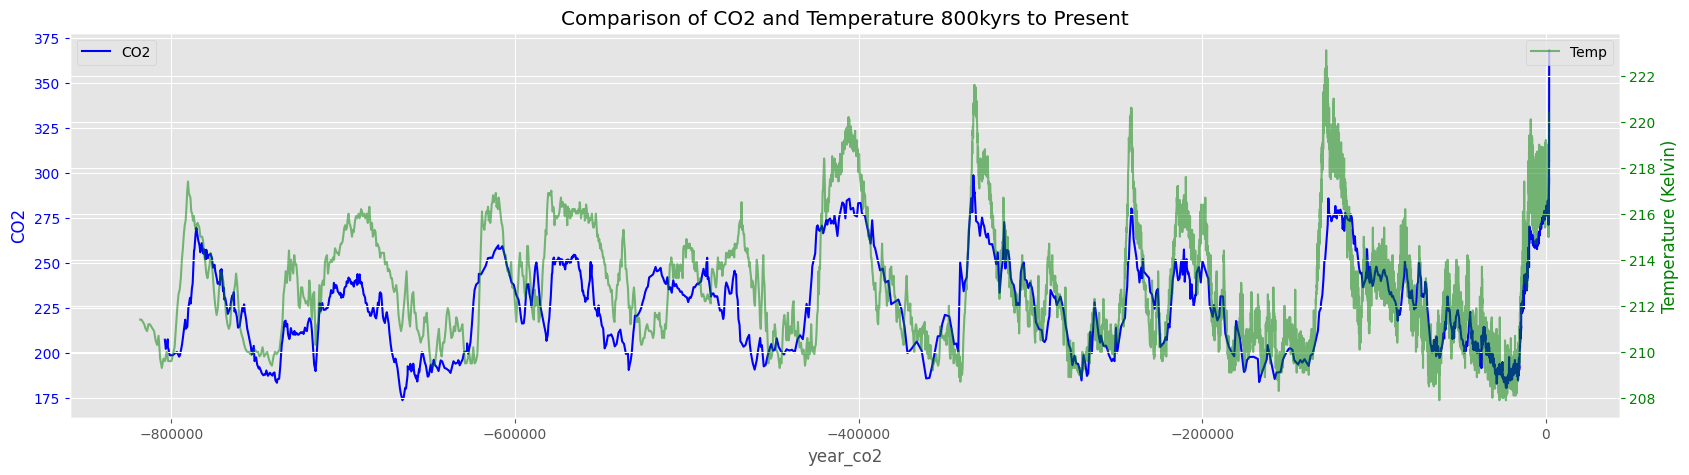

In [2046]:
# Plotting.
fig, ax1 = plt.subplots()

# Plot the CO2 data.
ax1.plot(co2df['year_co2'], co2df['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis.
ax2 = ax1.twinx()

# Plot the temperature data on the second y-axis.
ax2.plot(tempdf['year_temp'], tempdf['temp'], label='Temp', color='green',alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Add legend.
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title.
plt.title('Comparison of CO2 and Temperature 800kyrs to Present')

# Display the plot.
plt.show()

## Methane From 800kyrs to Present 

Methane data from https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt converted from txt file to csv file.

In [2047]:
# Read the content of the file
with open('Data/Methane CH4 800kyrs to present.txt', 'r') as file:
    lines = file.readlines()

# Process each line and add commas
lines_with_commas = []
for line in lines:
    columns = line.strip().split()  
    line_with_commas = ','.join(columns) + '\n'
    lines_with_commas.append(line_with_commas)

# Write the modified content back to the file
with open('Methane CH4 800kyrs to present.csv', 'w') as file:
    file.writelines(lines_with_commas)

Creating Methane dataframe. Gas Age (EDC3 gas age, years before 1950 AD)

In [2048]:
# Read in methane csv file.
ch4df=pd.read_csv('Methane CH4 800kyrs to present.csv', usecols=[1,2])

# Show. 
ch4df

,GasAge,CH4mean
0,13,907
1,126,784
2,130,762
3,151,710
4,184,727
...,...,...
2098,794938,428
2099,796320,418
2100,797277,396
2101,798417,458


In [2049]:
# Convert GasAge to calendar year.
base_year = 1950
ch4df['GasAge'] = base_year - ch4df['GasAge']

In [2050]:
# Convert year to int.
ch4df['GasAge'] = ch4df['GasAge'].astype(int)

In [2051]:
# Show.
ch4df

,GasAge,CH4mean
0,1937,907
1,1824,784
2,1820,762
3,1799,710
4,1766,727
...,...,...
2098,-792988,428
2099,-794370,418
2100,-795327,396
2101,-796467,458


### Methane Time-Series

[Text(0.5, 1.0, 'Methane Trend 800kyrs to Present')]

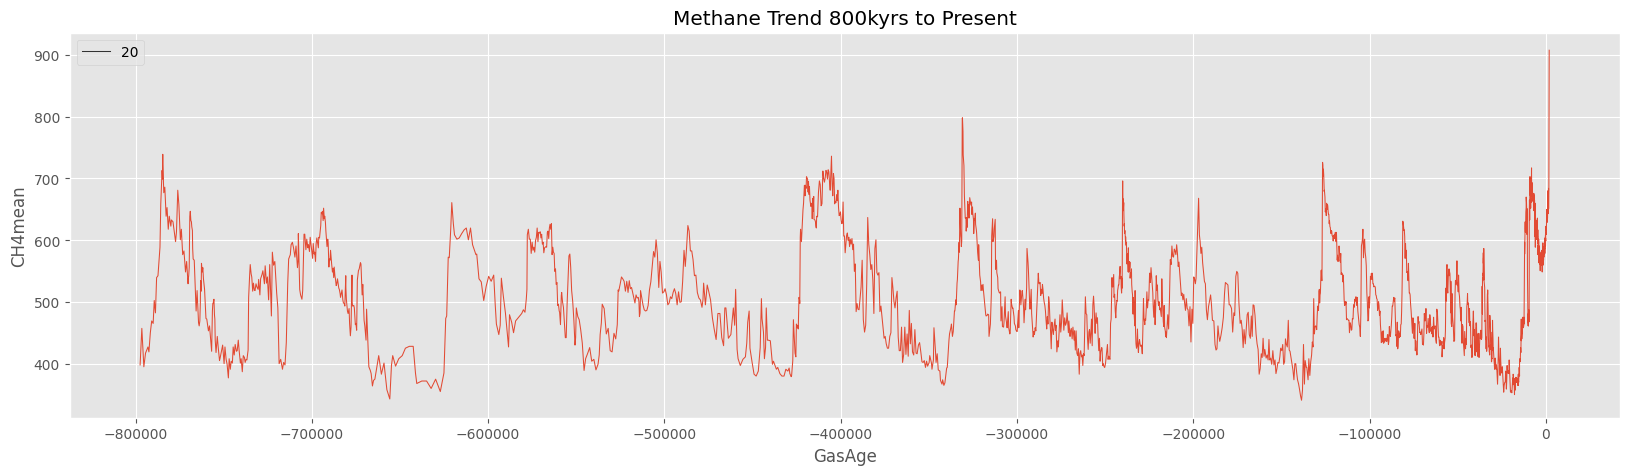

In [2052]:
sns.lineplot(data=ch4df, x='GasAge', y='CH4mean',size=20).set(title='Methane Trend 800kyrs to Present')

In [2053]:
# Convert GasAge to numpy array.
methane = ch4df['CH4mean'].to_numpy()

# Show.
methane

array([907, 784, 762, ..., 396, 458, 399], dtype=int64)

In [2054]:
# Get methane mean.
methane_mean = ch4df['CH4mean'].mean()

# Show.
methane_mean

519.9700427960057

In [2055]:
# Get methane standard deviation.
methane_std = ch4df['CH4mean'].std()

# Show.
methane_std

88.04749365140968

### Methane Frequency Analysis

Text(0.5, 1.0, 'Methane Frequency Analysis - Histogram')

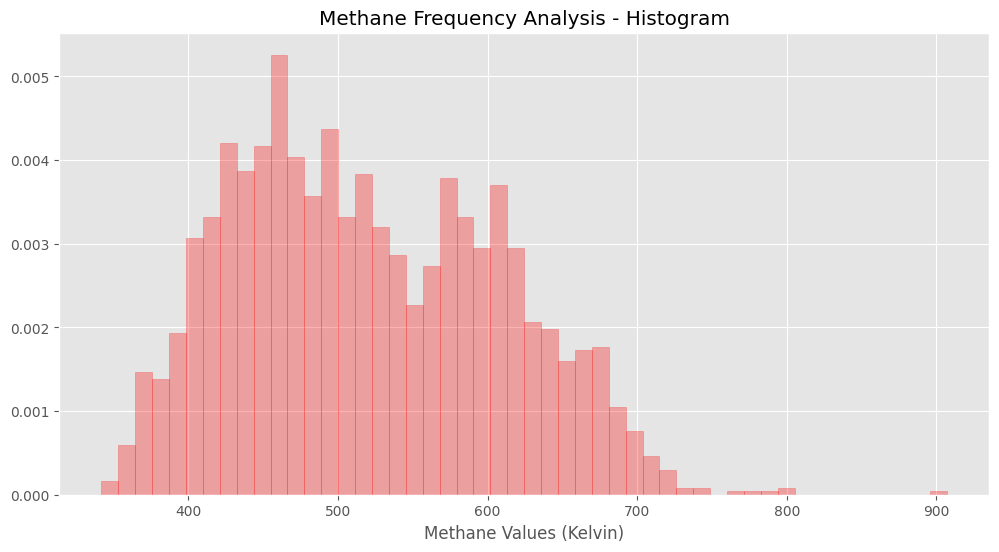

In [2056]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(methane, bins=50, density=True, color="red", alpha = 0.3, ec="red" )
plt.xlabel('Methane Values (Kelvin)')
plt.title('Methane Frequency Analysis - Histogram')

<Axes: ylabel='Density'>

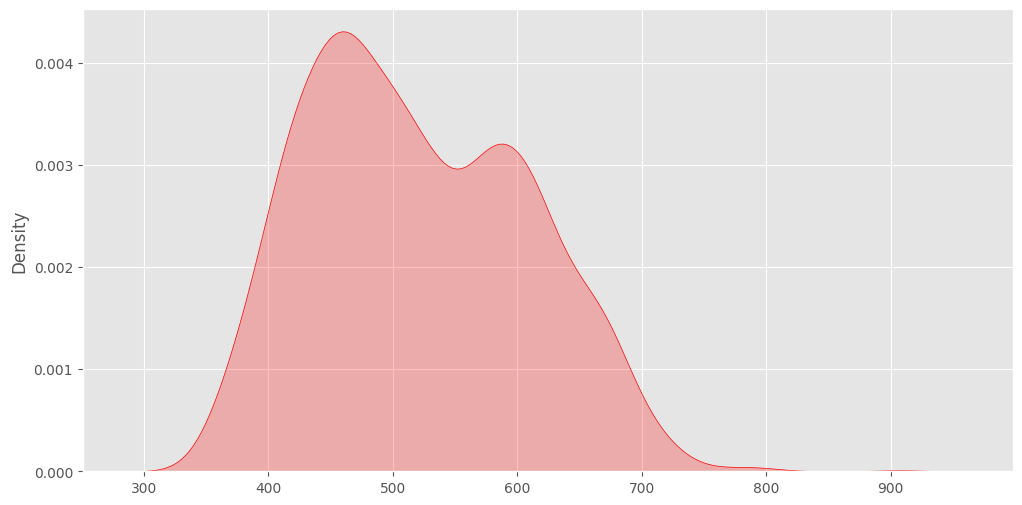

In [2057]:
# KDE plot.
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(methane, fill=True, color="Red")

### Time-Series CO2, Temperature and Methane Grouped

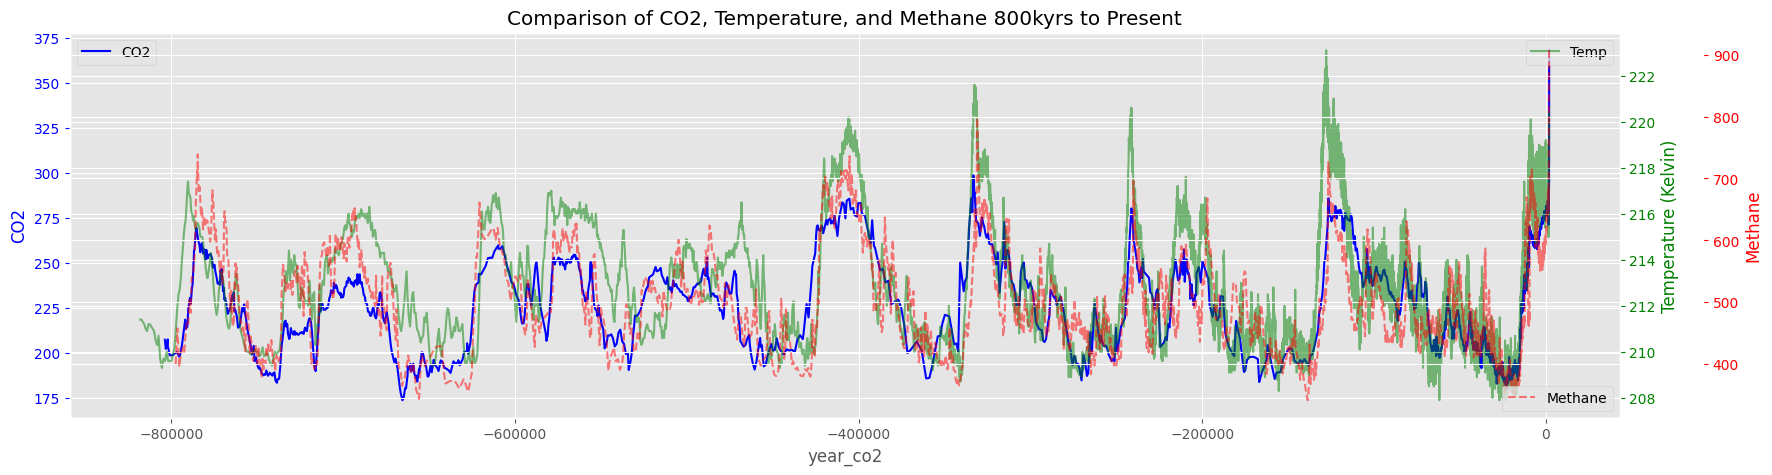

In [2058]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(co2df['year_co2'], co2df['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(tempdf['year_temp'], tempdf['temp'], label='Temp', color='green', alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Create a third y-axis
ax3 = ax1.twinx()

# Plot the third set of data on the third y-axis
ax3.plot(ch4df['GasAge'], ch4df['CH4mean'], label='Methane', color='red', linestyle='dashed', alpha=0.5)
ax3.set_ylabel('Methane', color='red')
ax3.tick_params('y', colors='red')

# Move the spine of the third y-axis to the right to avoid overlapping
ax3.spines['right'].set_position(('outward', 60))

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

# Add title
plt.title('Comparison of CO2, Temperature, and Methane 800kyrs to Present')

# Display the plot
plt.show()

The above graph depicts how CO2 (blue), temperature (green) and methane (red) has trended over the past 800,000 years. The trend shows a very strong correlation between the three variables and of the three temperature is the leading variable and CO2 and methane lagging slightly. Across the 800,000 years there are several cycles of peaks and troughs, with peaks getting progressively higher and are longer in duration, particularly in the past 400k years as it draws closer to present day.

### KDE plot for CO2, Temperature and Methane Grouped

<Axes: ylabel='Density'>

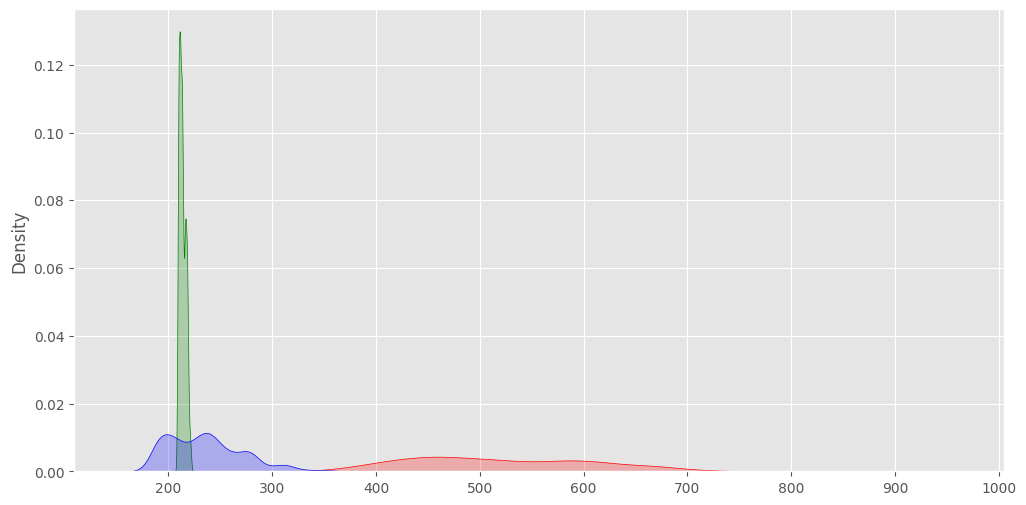

In [2059]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(methane, fill=True, color="Red")
sns.kdeplot(temp, fill=True, color="Green")
sns.kdeplot(co2, fill=True, color="Blue")

Although not comparing apples with apples it is interesting to observe the differences in the spread and the range of each of the three. variables 

### Irish Rainfall from 1711 to 2016

In [2060]:
# Read in data from url to csv file. 
ire_df = pd.read_csv("https://www.met.ie/cms/assets/uploads/2018/01/Long-Term-IIP-1711-2016.zip")

In [2061]:
# Convert to datetime.
ire_df['Date'] = pd.to_datetime(ire_df['Year'].astype(str) + ire_df['Month'].astype(str), format='%Y%m')

In [2062]:
# Show.
ire_df

,Year,Month,Median montly series,Date
0,1711,1,16.4,1711-01-01
1,1711,2,73.1,1711-02-01
2,1711,3,121.2,1711-03-01
3,1711,4,85.2,1711-04-01
4,1711,5,66.6,1711-05-01
...,...,...,...,...
3667,2016,8,79.1,2016-08-01
3668,2016,9,108.1,2016-09-01
3669,2016,10,51.8,2016-10-01
3670,2016,11,58.0,2016-11-01


Text(0, 0.5, 'Median Value')

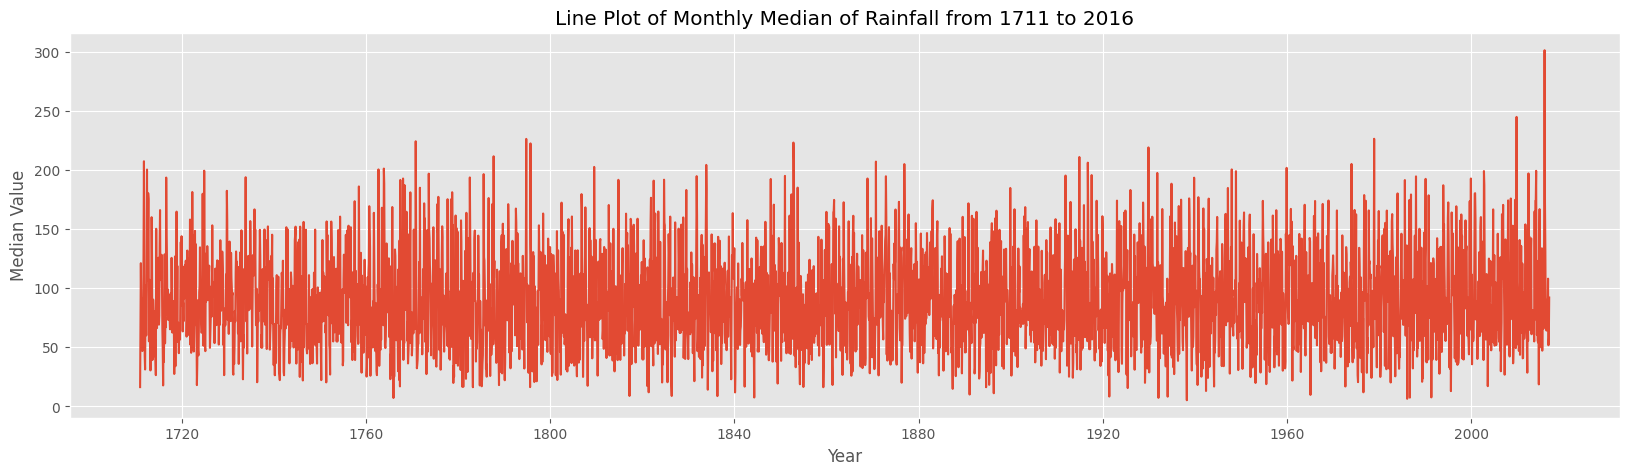

In [2063]:
# Time series line plot.
sns.lineplot(data=ire_df, x='Date', y='Median montly series' )
plt.title('Line Plot of Monthly Median of Rainfall from 1711 to 2016')
plt.xlabel('Year')
plt.ylabel('Median Value')

Text(0, 0.5, 'Median Value')

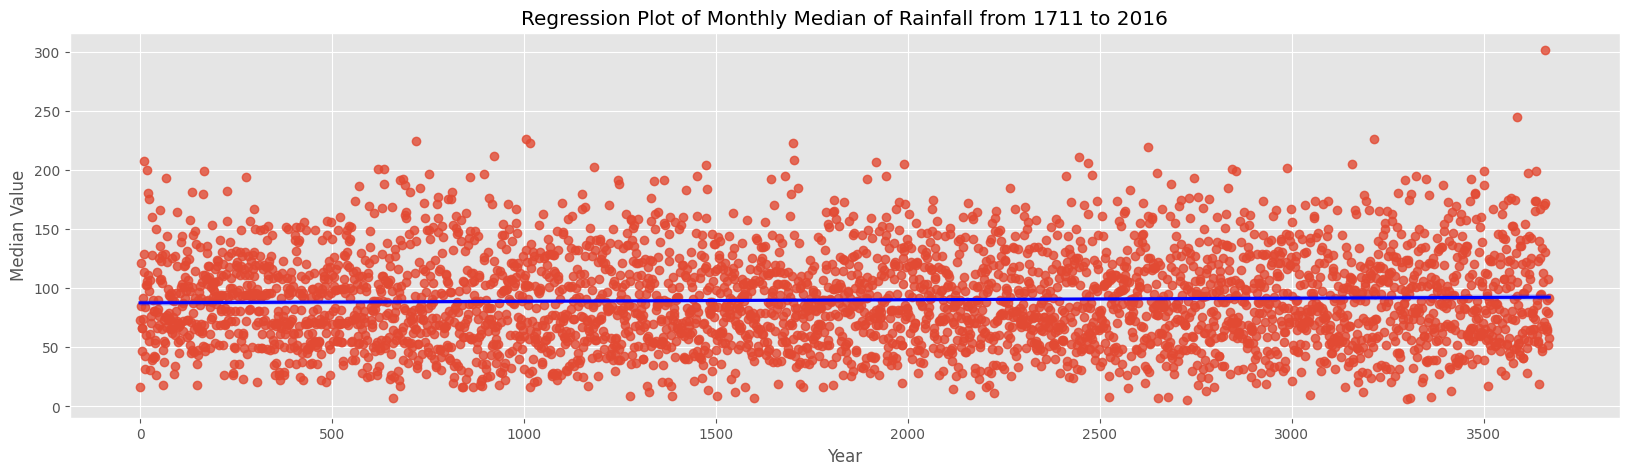

In [2064]:
# Scatterplot with regression line.
sns.regplot(x=ire_df.index, y="Median montly series", data=ire_df,  line_kws={"color": "blue"})
plt.title('Regression Plot of Monthly Median of Rainfall from 1711 to 2016')
plt.xlabel('Year')
plt.ylabel('Median Value')

In [2065]:
# Calculating the yearly median
yearly_median = ire_df.groupby('Year')['Median montly series'].median()

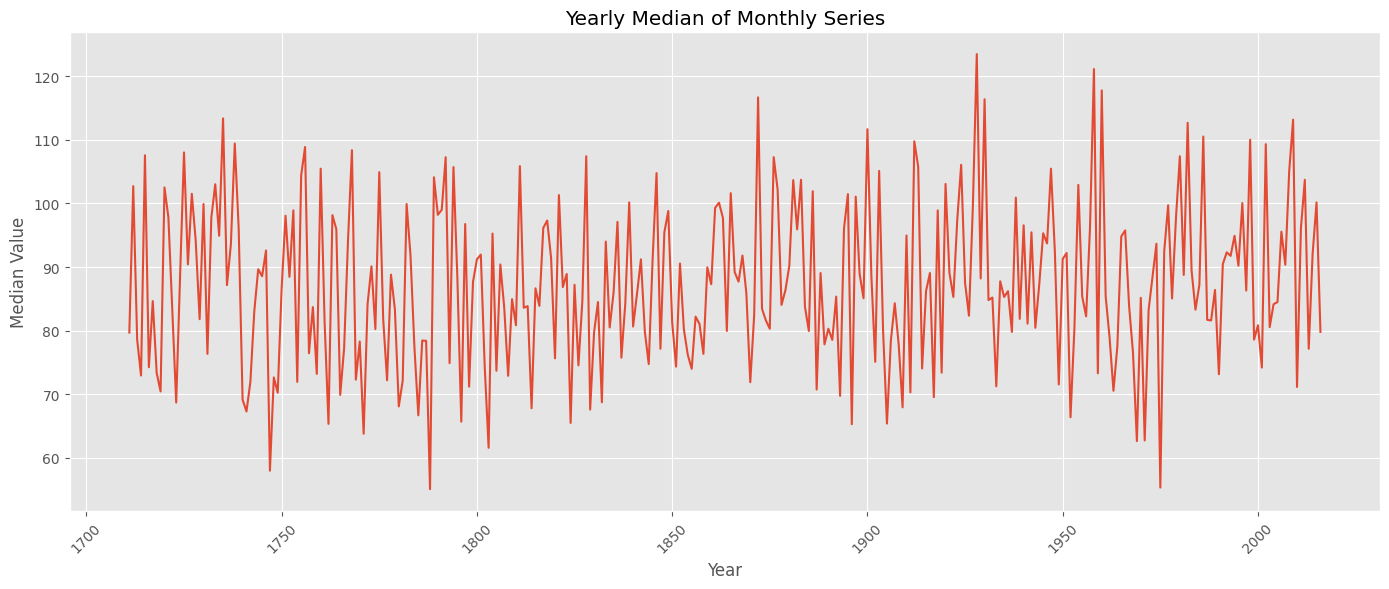

In [2066]:
# Plotting the yearly median
plt.figure(figsize=(14, 6))
yearly_median.plot(kind='line')
plt.title('Yearly Median of Monthly Series')
plt.xlabel('Year')
plt.ylabel('Median Value')
plt.xticks(rotation=45)
plt.tight_layout()

### Comparing Rainfall in Mayo and Wexford

In [2067]:
# Read in Mayo rainfall to csv file.
mayo_rain_df = pd.read_csv('Mayo_Rainfall.csv', skiprows=19, usecols=[0,1,7,])

FileNotFoundError: [Errno 2] No such file or directory: 'Mayo_Rainfall.csv'

In [ ]:
# Show.
mayo_rain_df

,year,month,rain
0,1956,9,49.9
1,1956,10,98.8
2,1956,11,51.6
3,1956,12,180.6
4,1957,1,148.5
...,...,...,...
797,2023,7,148.5
798,2023,8,117.2
799,2023,9,77.2
800,2023,10,100.0


In [ ]:
# Convert to datetime.
mayo_rain_df['mayo_date'] = pd.to_datetime(mayo_rain_df['year'].astype(str) + mayo_rain_df['month'].astype(str), format='%Y%m')

In [ ]:
mayo_rain_df['mayo_rain'] = mayo_rain_df['rain']

In [ ]:
mayo_rain_df

,year,month,rain,mayo_date,mayo_rain
0,1956,9,49.9,1956-09-01,49.9
1,1956,10,98.8,1956-10-01,98.8
2,1956,11,51.6,1956-11-01,51.6
3,1956,12,180.6,1956-12-01,180.6
4,1957,1,148.5,1957-01-01,148.5
...,...,...,...,...,...
797,2023,7,148.5,2023-07-01,148.5
798,2023,8,117.2,2023-08-01,117.2
799,2023,9,77.2,2023-09-01,77.2
800,2023,10,100.0,2023-10-01,100.0


In [ ]:
mayo = mayo_rain_df[['mayo_date','mayo_rain']].copy()

<Axes: xlabel='mayo_date', ylabel='mayo_rain'>

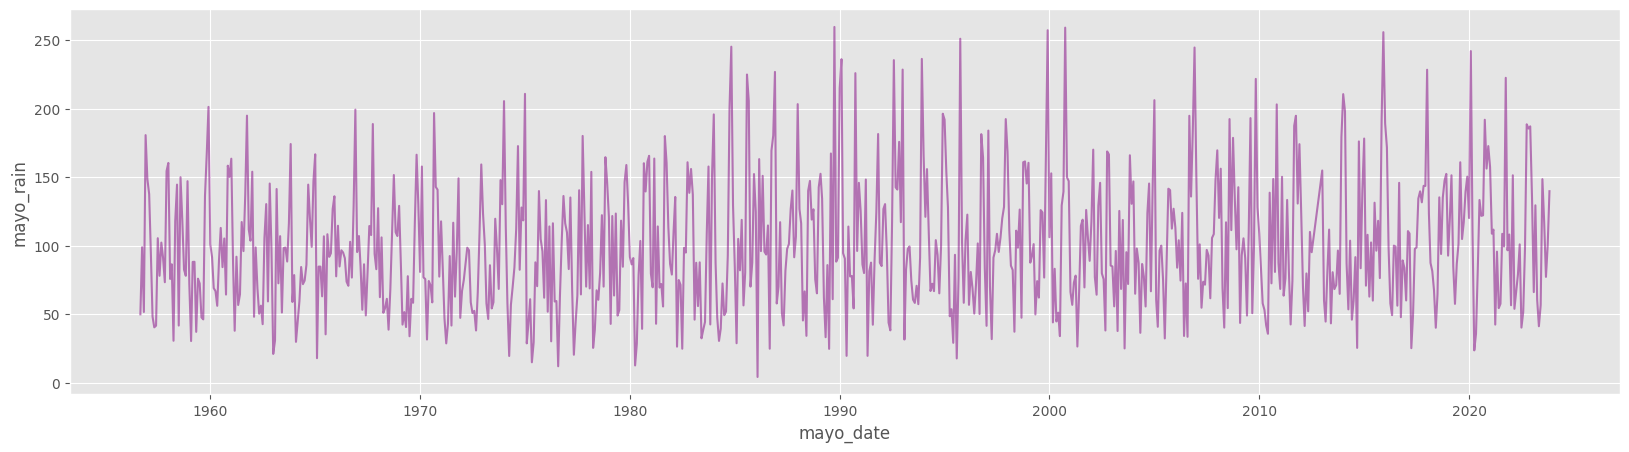

In [ ]:
# Time series line plot mayo rainfall.
sns.lineplot(data=mayo, x='mayo_date', y='mayo_rain', color = 'purple', alpha = 0.5 )

In [ ]:
# Set mayo_date column as the index.
mayo_rain_df.set_index('mayo_date', inplace=True)

Text(0, 0.5, 'Rainfall (mm)')

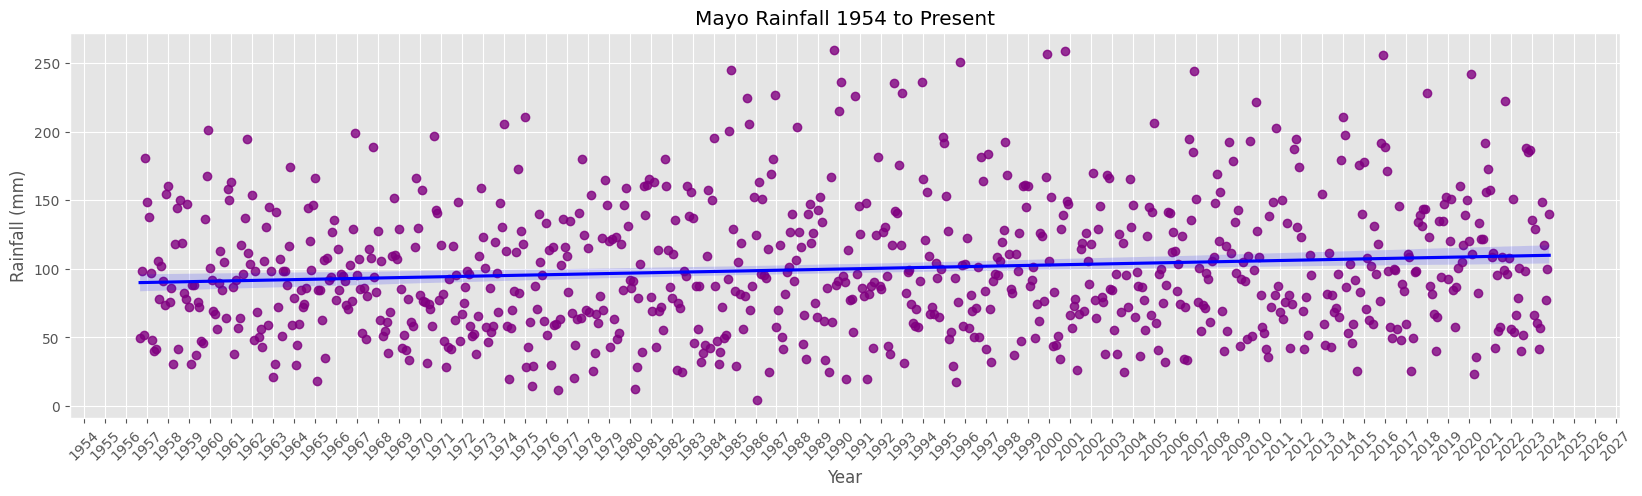

In [ ]:
# Scatter plot Wexford rainfall.
sns.regplot(x=mdates.date2num(mayo_rain_df.index), y="rain", data=mayo_rain_df, color='purple', line_kws={"color": "blue"})

# Formatting the x-axis.
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability.
plt.xticks(rotation=45)

# Add title and labels.
plt.title('Mayo Rainfall 1954 to Present')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')

The graph above shows there is a slight but not significant increase in the amount of rainfall over time in Mayo although the rainfall measurements vary quite significantly throughout the period. 

In [ ]:
# Repeat for wexford data.
wexford_rain_df=pd.read_csv('Wexford_Rainfall.csv', skiprows=13, usecols=[0,1,3])
wexford_rain_df['wex_date'] = pd.to_datetime(wexford_rain_df['year'].astype(str) + wexford_rain_df['month'].astype(str), format='%Y%m')
wexford_rain_df['wexford_rain'] = wexford_rain_df['rain']

In [ ]:
# Show.
wexford_rain_df 

,year,month,rain,wex_date,wexford_rain
0,1987,9,100.5,1987-09-01,100.5
1,1987,10,176.7,1987-10-01,176.7
2,1987,11,67.7,1987-11-01,67.7
3,1987,12,91.5,1987-12-01,91.5
4,1988,1,205.4,1988-01-01,205.4
...,...,...,...,...,...
425,2023,4,62.5,2023-04-01,62.5
426,2023,5,34.7,2023-05-01,34.7
427,2023,6,71.3,2023-06-01,71.3
428,2023,7,117.5,2023-07-01,117.5


In [ ]:
wexford = wexford_rain_df[['wex_date','wexford_rain']].copy()

<Axes: xlabel='wex_date', ylabel='wexford_rain'>

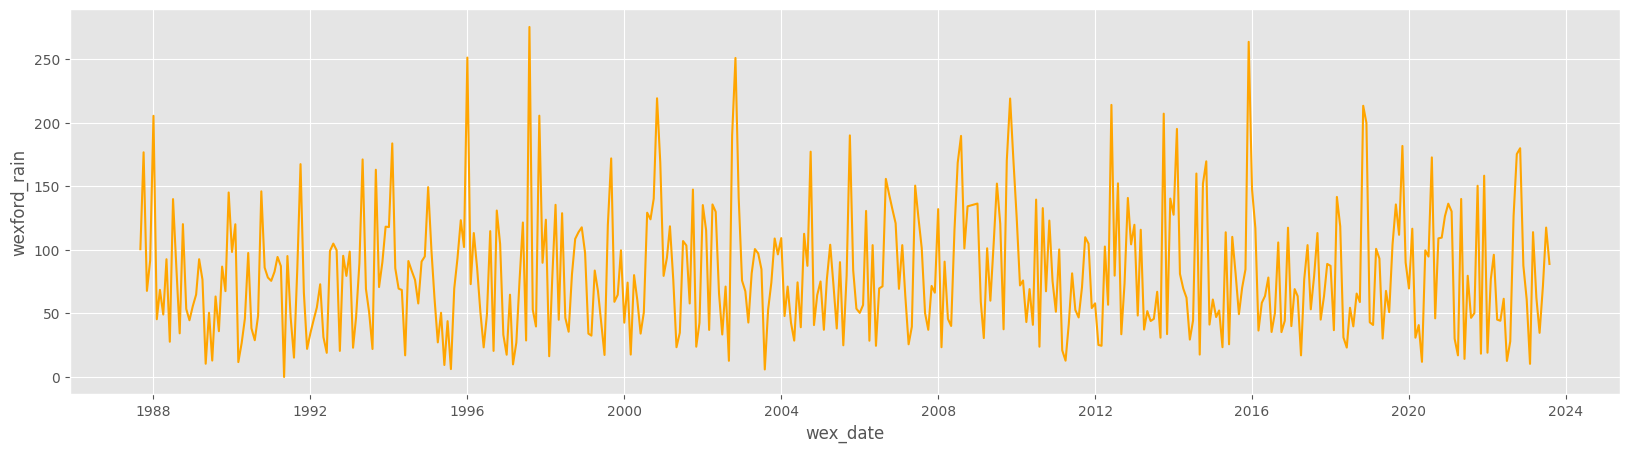

In [ ]:
# Time series line plot Wexford rainfall.
sns.lineplot(data=wexford, x="wex_date", y="wexford_rain", color = 'orange')

In [ ]:
# Set wex_date column as the index.
wexford_rain_df.set_index('wex_date', inplace=True)

Text(0, 0.5, 'Rainfall (mm)')

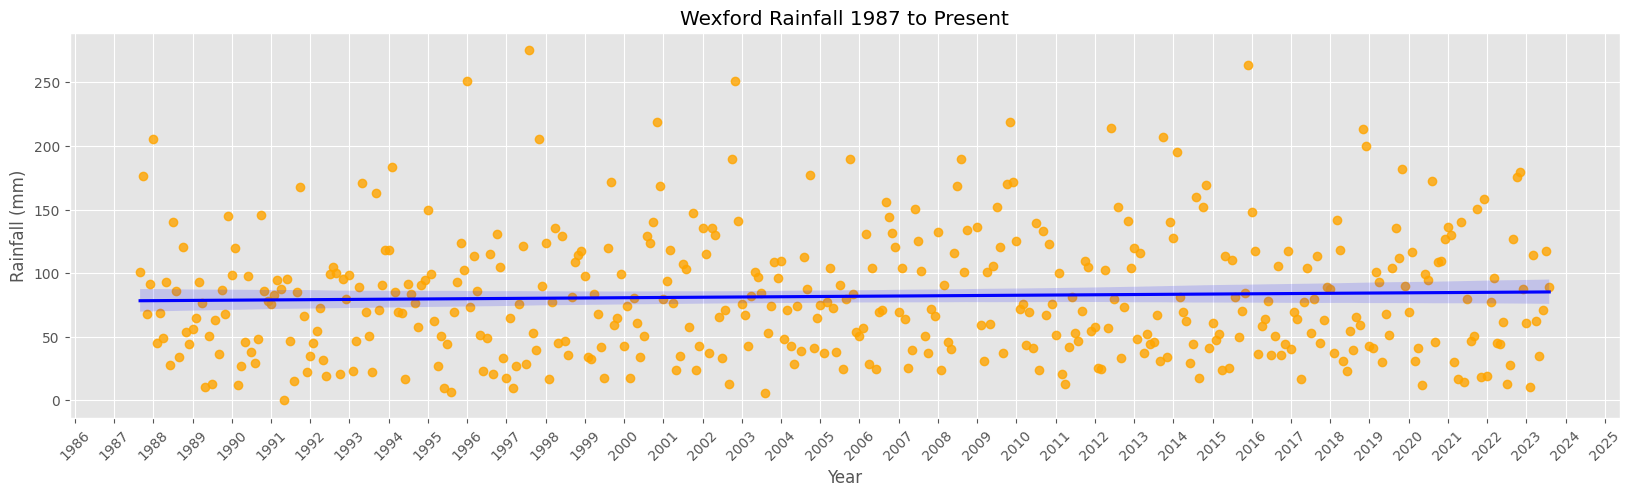

In [ ]:
# Scatter plot Wexford rainfall
sns.regplot(x=mdates.date2num(wexford_rain_df.index), y="rain", data=wexford_rain_df, color='orange', line_kws={"color": "blue"})

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Wexford Rainfall 1987 to Present')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')

The graph for Weford is for a shorter time frame than for the Mayo data above and shows a relatively flat regression line indicating no significant increase or decrease in the amount of rainfall over time in Wexford and again the rainfall measurements vary quite significantly. 

### Combining Mayo and Wexford Data Sets

In [ ]:
ireland_rain_df = pd.concat([mayo, wexford], axis =1)

In [ ]:
ireland_rain_df

,mayo_date,mayo_rain,wex_date,wexford_rain
0,1956-09-01,49.9,1987-09-01,100.5
1,1956-10-01,98.8,1987-10-01,176.7
2,1956-11-01,51.6,1987-11-01,67.7
3,1956-12-01,180.6,1987-12-01,91.5
4,1957-01-01,148.5,1988-01-01,205.4
...,...,...,...,...
797,2023-07-01,148.5,NaT,NaN
798,2023-08-01,117.2,NaT,NaN
799,2023-09-01,77.2,NaT,NaN
800,2023-10-01,100.0,NaT,NaN


#### Line plot

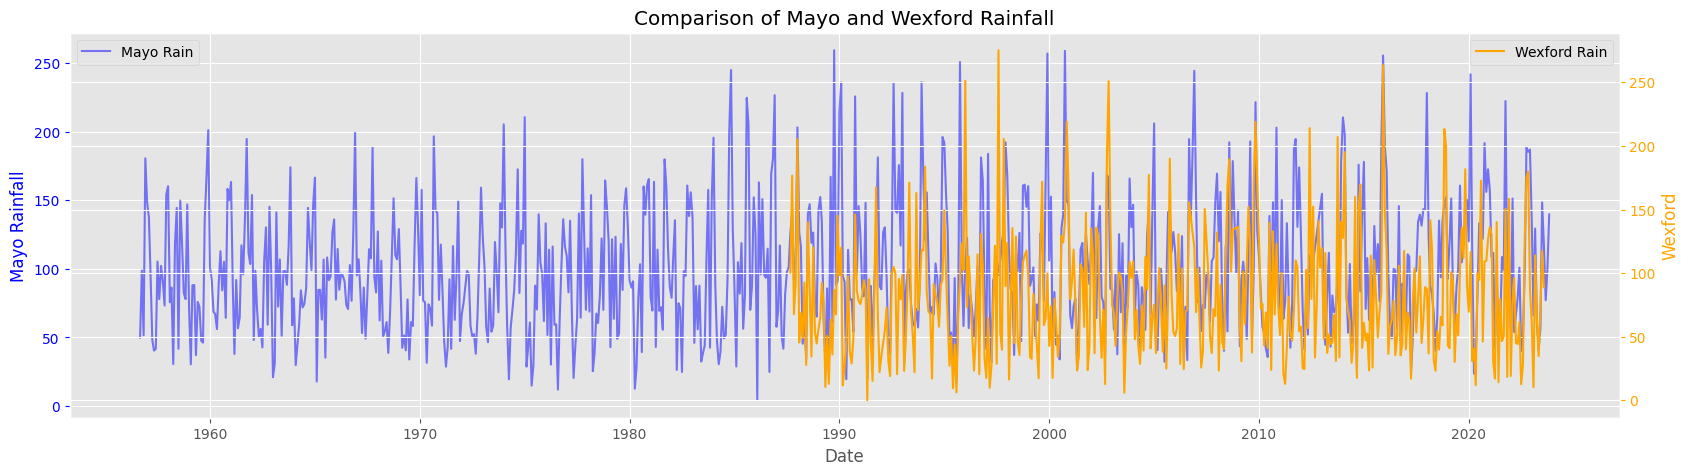

In [ ]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(ireland_rain_df['mayo_date'], ireland_rain_df['mayo_rain'], label='Mayo Rain', color='blue', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Mayo Rainfall', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(ireland_rain_df['wex_date'], ireland_rain_df['wexford_rain'], label='Wexford Rain', color='orange')
ax2.set_ylabel('Wexford', color='orange')
ax2.tick_params('y', colors='orange')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of Mayo and Wexford Rainfall')

# Display the plot
plt.show()

In [ ]:
# removing extra dates in mayo data.
reduced_mayo = mayo.iloc[372: ].reset_index(0)

In [ ]:
# Show.`
reduced_mayo

,index,mayo_date,mayo_rain
0,372,1987-09-01,126.7
1,373,1987-10-01,140.2
2,374,1987-11-01,91.5
3,375,1987-12-01,106.6
4,376,1988-01-01,203.2
...,...,...,...
425,797,2023-07-01,148.5
426,798,2023-08-01,117.2
427,799,2023-09-01,77.2
428,800,2023-10-01,100.0


In [ ]:
# Combining.
mayo_wex = pd.concat([reduced_mayo, wexford], axis =1)

In [ ]:
# Show.
mayo_wex

,index,mayo_date,mayo_rain,wex_date,wexford_rain
0,372,1987-09-01,126.7,1987-09-01,100.5
1,373,1987-10-01,140.2,1987-10-01,176.7
2,374,1987-11-01,91.5,1987-11-01,67.7
3,375,1987-12-01,106.6,1987-12-01,91.5
4,376,1988-01-01,203.2,1988-01-01,205.4
...,...,...,...,...,...
425,797,2023-07-01,148.5,2023-04-01,62.5
426,798,2023-08-01,117.2,2023-05-01,34.7
427,799,2023-09-01,77.2,2023-06-01,71.3
428,800,2023-10-01,100.0,2023-07-01,117.5


#### Regression Plot Mayo and Wexford Rainfall

In [ ]:
# Convert datetime objects to the numeric format for matplotlib
mayo_wex['mayo_date_num'] = mdates.date2num(mayo_wex['mayo_date'])
mayo_wex['wex_date_num'] = mdates.date2num(mayo_wex['wex_date'])

Text(0.5, 1.0, 'Comparison of Mayo and Wexford Rainfall 1987 to Present')

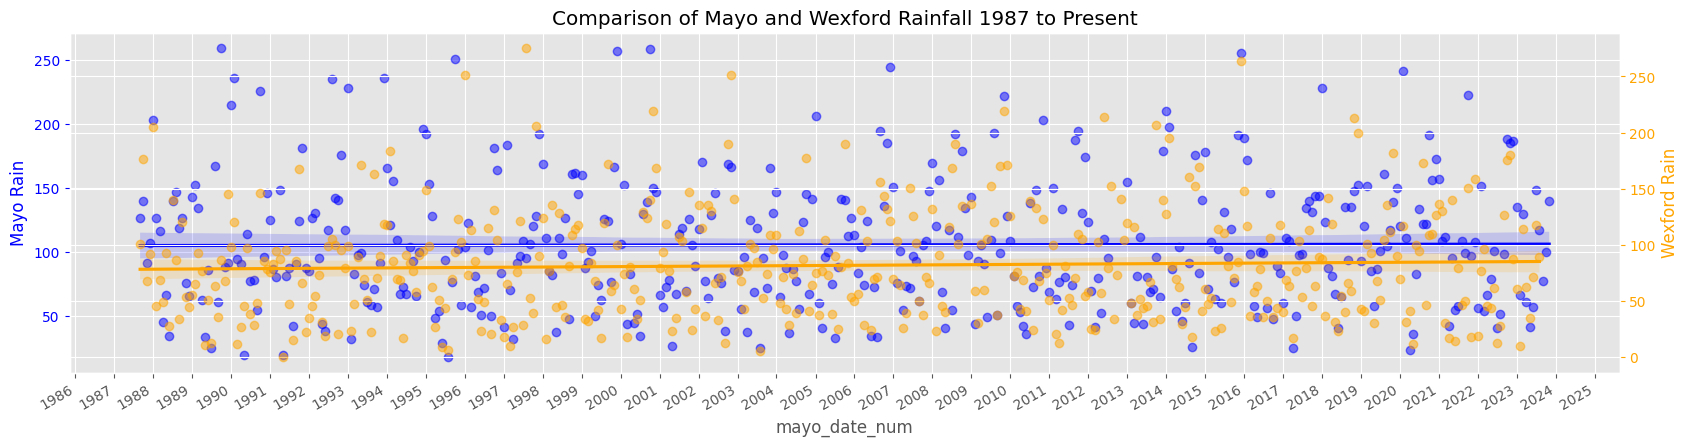

In [ ]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data and regression line
sns.regplot(x='mayo_date_num', y='mayo_rain', data=mayo_wex, ax=ax1,
            scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'blue'})

# Set the y-label for the first dataset
ax1.set_ylabel('Mayo Rain', color='blue')
ax1.tick_params('y', colors='blue')

# Formatting the x-axis to display dates
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data and regression line on the second y-axis
sns.regplot(x='wex_date_num', y='wexford_rain', data=mayo_wex, ax=ax2,
            scatter_kws={'color': 'orange', 'alpha': 0.5}, line_kws={'color': 'orange'})

# Set the y-label for the second dataset
ax2.set_ylabel('Wexford Rain', color='orange')
ax2.tick_params('y', colors='orange')

# Formatting the x-axis to display dates for the second axis
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
fig.autofmt_xdate()

# Add title
plt.title('Comparison of Mayo and Wexford Rainfall 1987 to Present')

#### Histogram of Mayo and Wexford Rainfall

(array([0.00076027, 0.00532189, 0.00608216, 0.0076027 , 0.01013693,
        0.00912324, 0.00582874, 0.00988351, 0.0076027 , 0.00684243,
        0.00658901, 0.00608216, 0.00532189, 0.00405477, 0.00405477,
        0.00278766, 0.00228081, 0.00076027, 0.00228081, 0.00126712,
        0.00101369, 0.00050685, 0.00076027, 0.00101369, 0.        ,
        0.        , 0.        , 0.00050685, 0.00025342, 0.00025342]),
 array([  0.        ,   9.17666667,  18.35333333,  27.53      ,
         36.70666667,  45.88333333,  55.06      ,  64.23666667,
         73.41333333,  82.59      ,  91.76666667, 100.94333333,
        110.12      , 119.29666667, 128.47333333, 137.65      ,
        146.82666667, 156.00333333, 165.18      , 174.35666667,
        183.53333333, 192.71      , 201.88666667, 211.06333333,
        220.24      , 229.41666667, 238.59333333, 247.77      ,
        256.94666667, 266.12333333, 275.3       ]),
 <BarContainer object of 30 artists>)

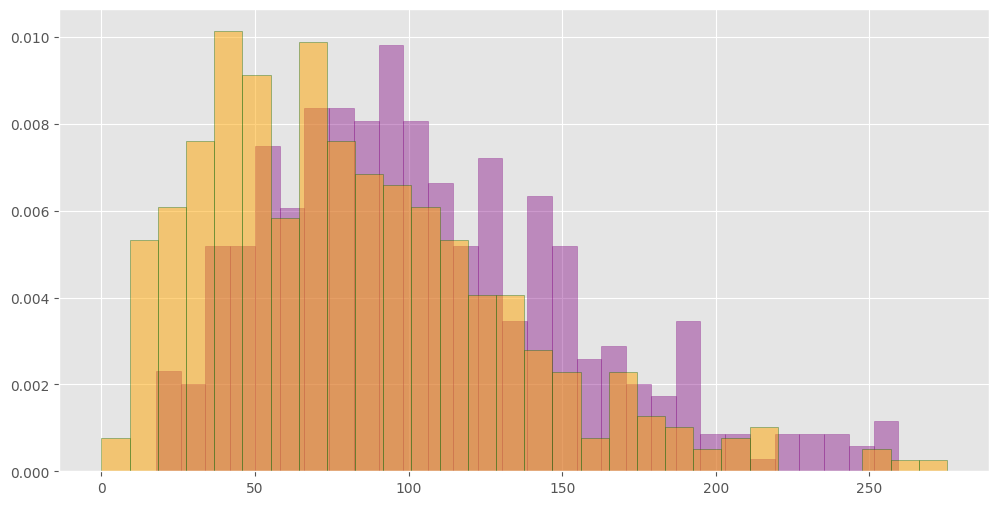

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(mayo_wex['mayo_rain'], bins=30, density=True, color="purple", ec="purple" , alpha = 0.4)
ax.hist(mayo_wex['wexford_rain'], bins=30, density=True, color="orange", ec="darkgreen" , alpha = 0.5)

<Axes: xlabel='mayo_rain', ylabel='Density'>

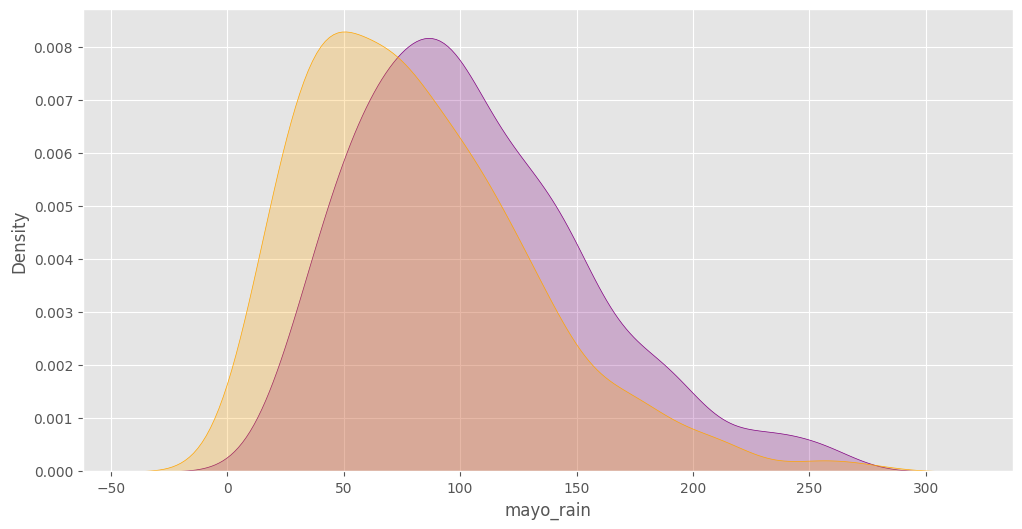

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(mayo_wex['mayo_rain'], fill=True, color="Purple")
sns.kdeplot(mayo_wex['wexford_rain'], fill=True, color="Orange")


In [ ]:
mayo_size = mayo_wex['mayo_rain'].count()
mayo_size

430

In [ ]:
mayo_mean = mayo_wex['mayo_rain'].mean()
mayo_mean

105.54465116279071

In [ ]:
mayo_std = mayo_wex['mayo_rain'].std()
mayo_std

50.105548332038566

In [ ]:
wex_size = mayo_wex['wexford_rain'].count()
wex_size

430

In [ ]:
wex_mean = mayo_wex['wexford_rain'].mean()
wex_mean

81.70930232558139

In [ ]:
wex_std = mayo_wex['wexford_rain'].std()
wex_std

49.209471930891965

In [ ]:
sample1 = np.random.normal(mayo_mean, mayo_std, mayo_size)
sample2 = np.random.normal(wex_mean, wex_std, wex_size)

In [ ]:
# Perform the t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

In [ ]:
# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 7.554097832934544
P-value: 1.0804668996555397e-13


Given the high t-statistic and the extremely low p-value, one can conclude that the difference in means between the two samples is statistically significant, meaning it is very unlikely that the observed difference occurred by chance, and there is a strong indication of a real difference in the population means.

### Combine All Data

In [ ]:
ireland_rain_df

,mayo_date,mayo_rain,wex_date,wexford_rain
0,1956-09-01,49.9,1987-09-01,100.5
1,1956-10-01,98.8,1987-10-01,176.7
2,1956-11-01,51.6,1987-11-01,67.7
3,1956-12-01,180.6,1987-12-01,91.5
4,1957-01-01,148.5,1988-01-01,205.4
...,...,...,...,...
797,2023-07-01,148.5,NaT,NaN
798,2023-08-01,117.2,NaT,NaN
799,2023-09-01,77.2,NaT,NaN
800,2023-10-01,100.0,NaT,NaN


In [ ]:
combined = pd.concat([co2df, tempdf, ch4df, ireland_rain_df], axis =1)

In [ ]:
combined

,CO2 (ppmv),year_co2,temp,year_temp,GasAge,CH4mean,mayo_date,mayo_rain,wex_date,wexford_rain
0,368.02,2001.0,218.3,2000,1937.0,907.0,1956-09-01,49.9,1987-09-01,100.5
1,361.78,1998.0,218.3,1993,1824.0,784.0,1956-10-01,98.8,1987-10-01,176.7
2,359.65,1996.0,218.3,1987,1820.0,762.0,1956-11-01,51.6,1987-11-01,67.7
3,357.11,1994.0,218.3,1981,1799.0,710.0,1956-12-01,180.6,1987-12-01,91.5
4,353.95,1993.0,218.3,1974,1766.0,727.0,1957-01-01,148.5,1988-01-01,205.4
...,...,...,...,...,...,...,...,...,...,...
5814,NaN,NaN,211.0,-814921,NaN,NaN,NaT,NaN,NaT,NaN
5815,NaN,NaN,211.2,-815743,NaN,NaN,NaT,NaN,NaT,NaN
5816,NaN,NaN,211.3,-816555,NaN,NaN,NaT,NaN,NaT,NaN
5817,NaN,NaN,211.4,-817353,NaN,NaN,NaT,NaN,NaT,NaN


In [ ]:
combined.to_csv('combined_data.csv', index=False) 

In [ ]:
combined.to_json('combined_data.json', orient='records') 

## Prediction of Global Temperature Anomoly 

In [ ]:
# Calculate the yearly increase in CO2
co2df.sort_values(by='year_co2', inplace=True)
co2df['increase'] = co2df['CO2 (ppmv)'].diff()
average_annual_increase = co2df['increase'].mean()
print("Average Increase:", average_annual_increase)

Average Increase: 0.08459473684210526


In [ ]:
# Recent data for  last 1000 years
recent_co2df = co2df[co2df['year_co2'] > -1000]

recent_co2df

,CO2 (ppmv),year_co2,increase
263,276.30,-998,1.70
262,274.70,-954,-1.60
261,275.30,-851,0.60
260,278.90,-758,3.60
259,273.90,-678,-5.00
...,...,...,...
4,353.95,1993,0.23
3,357.11,1994,3.16
2,359.65,1996,2.54
1,361.78,1998,2.13


Model Slope (°C/ppm): 0.08436094296560104
Model Intercept (°C): -25.182276959378203


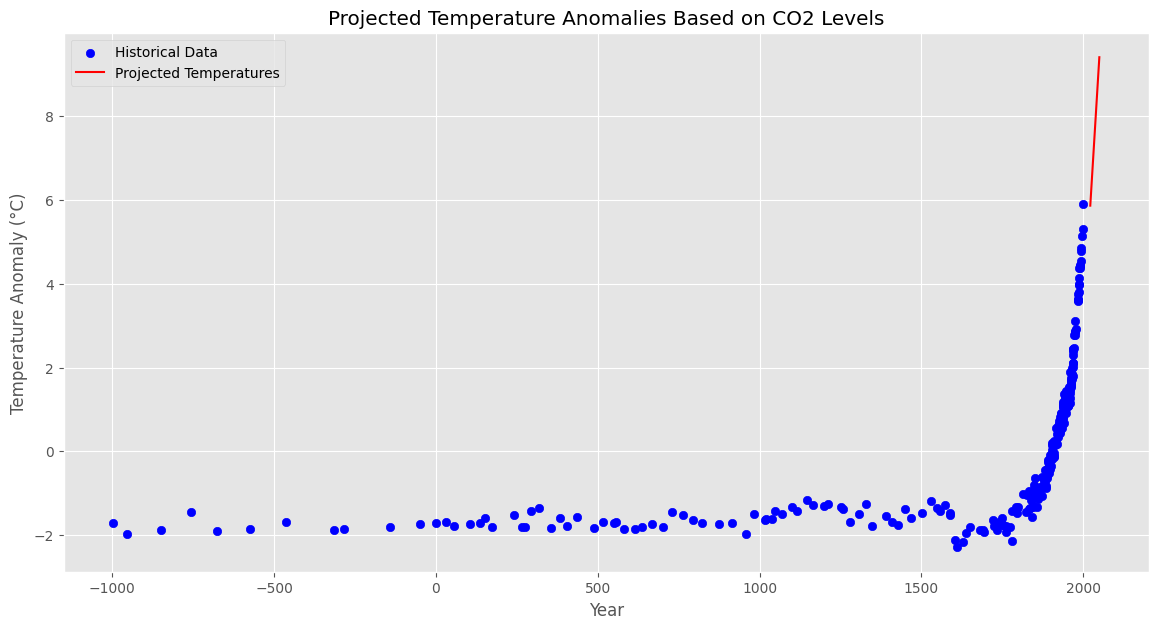

In [ ]:
# Synthesize temperature anomalies based on CO2 levels with added noise for demonstration
np.random.seed(0) 
recent_co2df = recent_co2df.copy() 
recent_co2df['Temperature Anomaly (°C)'] = (
    recent_co2df['CO2 (ppmv)'] - recent_co2df['CO2 (ppmv)'].mean()) * 0.085 + np.random.normal(0, 0.1, recent_co2df.shape[0])

# Prepare the features and target for the regression model
X = recent_co2df[['CO2 (ppmv)']].values
y = recent_co2df['Temperature Anomaly (°C)'].values

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Projecting future CO2 levels for prediction
projection_years = np.arange(2022, 2051)  # Years we want to predict
# We assume a linear increase in CO2 levels, adjust this as needed
projected_co2_increase = np.linspace(recent_co2df['CO2 (ppmv)'].max(),
                                     recent_co2df['CO2 (ppmv)'].max() + 1.5 * (projection_years[-1] - projection_years[0]),
                                     len(projection_years))

# Predict future temperature anomalies based on projected CO2 levels
projected_temps = model.predict(projected_co2_increase.reshape(-1, 1))

# Plotting the historical data and the projection
plt.figure(figsize=(14, 7))
plt.scatter(recent_co2df['year_co2'], y, color='blue', label='Historical Data')
plt.plot(projection_years, projected_temps, color='red', label='Projected Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Projected Temperature Anomalies Based on CO2 Levels')
plt.legend()
plt.grid(True)

# Output the slope (rate of temperature change per ppm of CO2) and intercept of the model
model_slope = model.coef_[0]
model_intercept = model.intercept_
print("Model Slope (°C/ppm):", model_slope)
print("Model Intercept (°C):", model_intercept)


In [ ]:
paleo_combined = pd.concat([co2df, tempdf, ch4df], axis =1)

In [ ]:
paleo_combined_cleaned = paleo_combined.dropna()

In [ ]:
# Perform the regression analysis
X = paleo_combined_cleaned[['CO2 (ppmv)', 'temp']]
y = paleo_combined_cleaned['CH4mean']

# Handle missing values by dropping rows with missing values
data = pd.concat([X, y], axis=1).dropna()

X = data[['CO2 (ppmv)', 'temp']]
y = data['CH4mean']

X = sm.add_constant(X)  # Add a constant term to the independent variables

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                CH4mean   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     101.4
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        10:45:07   Log-Likelihood:                -11117.
No. Observations:                1900   AIC:                         2.224e+04
Df Residuals:                    1897   BIC:                         2.226e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        284.0734    124.424      2.283      0.0

### References

[1] pandas.pydata.org. (n.d.). pandas.DataFrame.apply — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html. [Accessed 20 Dec. 2023].

[2] Marsja, E. (2023). Combine Year and Month Columns in Pandas. [online] Erik Marsja. Available at: https://www.marsja.se/combine-year-and-month-columns-in-pandas/ [Accessed 20 Dec. 2023].‌

[3] Stack Overflow. (n.d.). python - How to change the figure size of a seaborn axes or figure level plot. [online] Available at: https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot. [Accessed 20 Dec. 2023].

[4] matplotlib.org. (n.d.). matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html. [Accessed 20 Dec. 2023]

[6] Jouzel, J., V. Masson-Delmotte, O. Cattani, G. Dreyfus, S. Falourd, G. Hoffmann, B. Minster, J. Nouet, J.M. Barnola, J. Chappellaz, H. Fischer, J.C. Gallet, S. Johnsen, M. Leuenberger, L. Loulergue, D. Luethi, H. Oerter, F. Parrenin, G. Raisbeck, D. Raynaud, A. Schilt, J. Schwander, E. Selmo, R. Souchez, R. Spahni, B. Stauffer, J.P. Steffensen, B. Stenni, T.F. Stocker, J.L. Tison, M. Werner, and E.W. Wolff.  2007. Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years. Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007.

[7] Loulergue, L., A. Schilt, R. Spahni, V. Masson-Delmotte, T. Blunier, B. Lemieux, J.-M. Barnola, D. Raynaud, T.F. Stocker, and J. Chappellaz. 2008. Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature, Vol. 453, pp. 383-386, 15 May 2008. doi:10.1038/nature06950. Noaa.gov. (2013). Available at: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt [Accessed 20 Dec. 2023]. ‌

[8] Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949

[9] Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.


[10] Stack Overflow. (n.d.). python - How to make inline plots in Jupyter Notebook larger? [online] Available at: https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger. [Accessed 21 Dec. 2023]. ‌

[11] Pursuit. (2017). Key greenhouse gases higher than any time over last 800,000 years. [online] Available at: https://pursuit.unimelb.edu.au/articles/key-greenhouse-gases-higher-than-any-time-over-last-800-000-years.

[12] pandas.pydata.org. (n.d.). pandas.DataFrame.astype — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html. [Accessed 21 Dec. 2023]. 

[13] Fusio.net. (2023). Available at: https://cli.fusio.net/cli/climate_data/webdata/mly2375.zip [Accessed 21 Dec. 2023].‌

[14] Nik (2023). Converting Pandas DataFrame Column from Object to Float • datagy. [online] datagy. Available at: https://datagy.io/pandas-convert-object-to-float/ [Accessed 22 Dec. 2023].‌

[15] Stack Overflow. (n.d.). python - Different colors for points and line in Seaborn regplot. [online] Available at: https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot.

[16] Stack Overflow. (n.d.). scatter plot with multiple X features and single Y in Python. [online] Available at: https://stackoverflow.com/questions/59140950/scatter-plot-with-multiple-x-features-and-single-y-in-python [Accessed 22 Dec. 2023].

[17] pandas.pydata.org. (n.d.). pandas.DataFrame.drop — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html.

‌

‌